### <span style="color:brown">Notebook Instructions</span>

- <i>  <span style="color:#FFFF00; background:#00C000"> <b> Please download the notebook available as downloads in the next unit. </b> It will not run in the browser.</i>
- <i>  Assuming, you have Anaconda or some Python environment installed on your system, <span style="color:#FFFF00; background:#00C000"> <b> you need to install Keras library. </b>. </i>
- <i> <span style="color:#00C000"> DNN models are very heavy and it is possible that your code will take time to run. Be patient and try again if required. Keep your CPU free of other burdens during the time of run! </i>


#### When running this model on your system, please convert the cells in RawNBConvert format type to Code type, using the dropdown for cell type option present in the menu bar.####

### <span style="color:brown">Notebook Objectives</span>

This notebook contains the code and explanation of a DNN model that predicts the trend of a stock. The prediction of the model is used to create a trading strategy and its returns are compared with market returns. 



### <span style="color:brown">Fetching the data</span>

In the cell below, we declare the required libraries. 

In [1]:
from nsepy import get_history # to fetch the data of the stock from NSE, India 
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler  # library required for scaling the data
import pandas as pd
import quandl
import talib as ta

In the cell below, the two variables that signify the start and end dates are signified. We will fetch the data falling within these dates. 

In [2]:
quandl.connection.ApiConfig.api_key= "_N85bWLCNCWz14smKHSi"

In [34]:
start = date(2013,1,1)
end= date.today()

In [35]:
data = quandl.get('WIKI/AAPL',start_date=start,end_date=end)

We have used the nsepy library to fetch the data of the stock <font color='green'> State Bank of India </font>. The data is directly fetched from the exchange (NSE) website. 

In the cell below, the data is fetched using <i>get_history()(</i>). The closing prices of the data are plotted. 

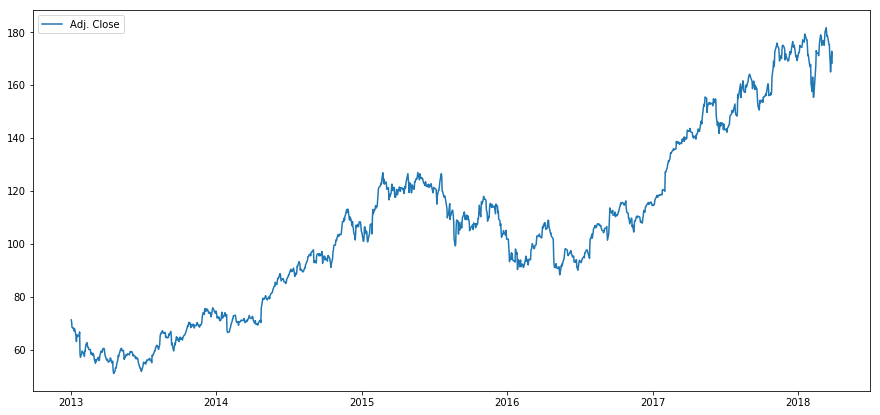

In [36]:
#data = get_history(symbol="SBIN", start=start, end=end) #SBIN is symbol name for State Bank of India
plt.figure(figsize=(15,7))
plt.plot(data['Adj. Close'])
plt.legend(['Adj. Close'])
plt.show()

In [37]:
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2013-01-02,553.820,555.0000,541.6300,549.0300,20018500.0,0.0,1.0,71.816894,71.969911,70.236149,71.195748,140129500.0
2013-01-03,547.880,549.6700,541.0000,542.0959,12605900.0,0.0,1.0,71.046621,71.278740,70.154453,70.296565,88241300.0
2013-01-04,536.965,538.6299,525.8286,527.0000,21226200.0,0.0,1.0,69.631213,69.847109,68.187094,68.338996,148583400.0
2013-01-07,522.000,529.3000,515.2000,523.9000,17291300.0,0.0,1.0,67.690619,68.637250,66.808825,67.937002,121039100.0
2013-01-08,529.210,531.8900,521.2500,525.3100,16382400.0,0.0,1.0,68.625579,68.973109,67.593362,68.119845,114676800.0


### <span style="color:brown">Scaling the data</span>

Our input data or features consists of Open, Low, High & Close (OHLC) prices and Volume. The prices and the volume would be scaled in different fashions. 

The in-built function MinMaxScaler, avalibale in sklearn, is used to scale the Volume column. It can't be used to scale the prices columns, because it scales each column individually and ignores the relationship between them. We want to retain the dependency between High >= Close >= Low, so will scale these columns without the function. 

#### <span style="color:#ac6600">Scaling the prices (OHLC)</span>

- Find the minimum and maximum values of all OHLC prices in the entire data set
- Scale up the OHLC columns accordingly so that the resultant values are between 0-1.

These two steps are carried in the next two cells. 

In [38]:
max_=data[['Adj. Open','Adj. High','Adj. Low','Adj. Close']].max().max() #Using .max() once gives the maximum values of each column
min_=data[['Adj. Open','Adj. High','Adj. Low','Adj. Close']].min().min()
max_,min_

(183.5, 50.220676648948)

In [39]:
X1=(data[['Adj. Open','Adj. High','Adj. Low','Adj. Close']]-min_)/(max_-min_)
X1=np.array(X1)

In [44]:
X1.shape

(1316, 4)

#### <span style="color:#ac6600">Scaling the volume</span>

The scaler function that we have used below is an in-built function in sklearn that exactly performs the same scaling technique that we used on the OHLC data. Here we have used this MinMaxScaler to scale the Volume column.

In [41]:
# Here we will instantiate a Minmaxscaler function 
# Then fit the Volume column data and transform it to the range of 0,1.
# Here we specify the shape of input as it is a single column, and sklearn expexcts you to explicyt 
# reshape when input data is a single column
scl=MinMaxScaler()
X2=scl.fit_transform(data[['Adj. Volume']].values.reshape(-1,1))

Now, we will reassign the computed values back into the data and print it to see the changes

In [42]:
data=data.assign(Open=X1[:,0])
data=data.assign(High=X1[:,1])
data=data.assign(Low=X1[:,2])
data=data.assign(Close=X1[:,3])
data=data.assign(Volume=X2[:,0])
data.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,0.936524,0.936899,0.908163,0.908238,0.067201,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0
2018-03-22,0.898709,0.918817,0.888205,0.890043,0.083608,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0
2018-03-23,0.886629,0.898109,0.860744,0.860744,0.081340,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0
2018-03-26,0.884228,0.921968,0.871998,0.919492,0.070099,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0
2018-03-27,0.926320,0.937350,0.875600,0.886254,0.077704,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0


#### <span style="color:#ac6600">Check out the updated columns</span>

You can see that the OHLCV values have been updated in the table above and they are all within the range 0-1.

### <span style="color:brown">Creating feature and target datasets</span>

Now, we will create prediction data 'Y' and split test/training sets. 

The steps are: 

- Step 1: Create a feature data set (OHLCV) called <font color =red>X</font> which will be used to create the input for the DNN model
- Step 2: Create a dataset called <font color =red>y</font> that contains the future price trend
- Step 3: Split the dataset so that the last 100 rows are test data.


In [57]:
# Step 1: Creation of Dataset X
X=data[['Open','High','Low','Close','Volume']]

In [58]:
# Step 2: Creation of Dataset y
# Here we first create a column of ones that has the same length as the dataframe 'data'.
# Later we will store the target values in this column.
# We have given the target of predicting the weekly returns' trend to our strategy.
# So the target variable will attempt to predict if the close price has increased or decreased after 5 trading days.
y=np.ones(len(data.Close))
y=np.where(data.Close.shift(-5)>data.Close,1,0) # If the returns are higher, then 'y' is 1, else '0'.

In [59]:
# Step 3: Creation of 4 Datasets
test_size=100
X_train=np.array(X.iloc[:-test_size])
y_train=np.array(y[:-test_size])
X_test=np.array(X.iloc[-test_size:])
y_test=np.array(y[-test_size:])

Note that the value of 'y' is only 0 or 1. These are called 'Classes' or categories. If one class is more than the other class then the model will end up learning more instances of one, and may predict only that class correctly. To counter this, we will set weights to both the classes which will enforce the model to give different learning weightage to different classes, making the net weight of all classes equal.

### <span style="color:brown">Set Class Weights</span>

The steps are:
- Calculate the number of instances of each class (#s of '0's and '1's)
- Calculate the percentage distribution of each class in the train data (% of '0's and '1's)
- Allocate the percentage distribution of class 0 to class 1 and vice versa (this is explained in a previous video)

This allows the model to pick data of both the classes or cases, when the output(y) is '0' or '1', with equal probabilitiy. Hence, the model should learn well. 

In [60]:
class_1=y_train.sum()
class_0=len(y_train)-class_1

class_1,class_0

(680, 536)

Here we will calcualte the percentage of each of the classes in the train dataset.
Once this is done, we allocate the percentage allocation of Class 0 to be equal to the percentage of Class 1 labels in the train data.
The purpose of doing this is to give equal importance to both the classes. 

In [61]:
class_0_percentage=class_0/len(y_train)
class_1_percentage=class_1/len(y_train)

class_0_weight=class_1_percentage
class_1_weight=class_0_percentage

# We will create a dictionary called class_weight to allocate the corresponding weghts to each of the labels.
class_weight={0:class_0_weight,1:class_1_weight}

And that concludes data pre-processing steps! You are doing great!!! 

### <span style="color:brown">Creating the DNN model</span>

We have three code cells here, which 

- Import the libraries
- Define the hyper parameters 
- Create the model sequentially, layer by layer


In [62]:
#Libraries
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense, Activation
from keras.callbacks import ModelCheckpoint
from keras.layers import BatchNormalization

Did you see this error? 
ModuleNotFoundError: No module named 'keras'

If yes, then <span style="color:#ac6600">please install Keras!</span> If not, then please ignore! 

In [63]:
# Parameters - please tweak them in later runs
dropout_ratio=0.23
momentum=0.99
np.random.seed(42)
neurons=175
act_1='tanh'
act_2='softmax'

Before we create the model, let us understand the code for the first layer 

*model.add(Dense(neurons, use_bias=True, kernel_initializer='he_normal',bias_initializer='zeros',input_shape=X_train.shape[1:]))*

- Dense: to define a dense layer
- neurons: to define the number of neurons (this keeps on increasing in every layer)
- use_bias=True: it keeps the bias term in the equation
- kernel_initializer='he_normal': at the first run, use weights from He-normal distribution
- bias_initializer='zeros': at the first run, use bias as '0'
- input_shape=X_train.shape[1:])): to define the number of columns or features that go as input in the first run

It is not difficult to understand the code for other layers now! 


In [64]:
# The DNN Model

model=Sequential() #We want the layers to work sequentially, one after other.

# Layer 1
model.add(Dense(neurons, use_bias=True, kernel_initializer='he_normal',bias_initializer='zeros',input_shape=X_train.shape[1:]))
model.add(Activation(act_1))
model.add(Dropout(dropout_ratio))

# Layer 2
model.add(Dense(neurons*2, use_bias=True, kernel_initializer='he_normal'
               , bias_initializer='zeros'))
model.add(Activation(act_1))
model.add(Dropout(dropout_ratio))

# Layer 3
model.add(Dense(neurons*3, use_bias=True, kernel_initializer='he_normal'
               , bias_initializer='zeros'))
model.add(Activation(act_1))
model.add(Dropout(dropout_ratio))

# Layer 4
model.add(Dense(neurons*4, use_bias=True, kernel_initializer='he_normal'
              , bias_initializer='zeros'))
model.add(Activation(act_1))
model.add(Dropout(dropout_ratio))

# Layer 5
model.add(Dense(neurons*5, use_bias=True, kernel_initializer='he_normal'
              , bias_initializer='zeros'))
model.add(Activation(act_1))
model.add(Dropout(dropout_ratio))

model.add(Dense(1,activation='sigmoid')) # Layer 6

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

### <span style="color:brown">Define and save the monitoring parameter</span>

In Keras, we can save the best weights of the model by creating a checkpoint during the training of the model. To create a checkpoint, we specify the metric that needs to be monitored and saved accordingly.  

<span style="color:#ac6600">Validation set loss</span> is passed as the monitoring parameter. The mode of saving is specified as 'auto'. This means that the model will save the weights of the network whenever a low value for the validation loss is generated. 

The file path is weights-best2.hdf5 to save the weights of the model.

The verbose=1 parameter defines how much information about every batch training needs to be printed.

In [65]:
filepath="weights-best2.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [66]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 175)               1050      
_________________________________________________________________
activation_11 (Activation)   (None, 175)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 175)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 350)               61600     
_________________________________________________________________
activation_12 (Activation)   (None, 350)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 350)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 525)               184275    
__________

### <span style="color:brown">Training the model</span>


Now, its time to train the model.

The callback feature in the code below saves the best weights. 

In [67]:
training=model.fit(X_train, y_train, epochs=150, batch_size=256, verbose=1, validation_split=0.2,
                   callbacks=[checkpoint],class_weight=class_weight)

Train on 972 samples, validate on 244 samples
Epoch 1/150
972/972 [==============================] - 1s 1ms/step - loss: 0.9190 - acc: 0.5134 - val_loss: 0.6008 - val_acc: 0.6680

Epoch 00001: val_loss improved from inf to 0.60076, saving model to weights-best2.hdf5
Epoch 2/150
972/972 [==============================] - 0s 242us/step - loss: 0.4895 - acc: 0.5319 - val_loss: 0.4919 - val_acc: 0.3320

Epoch 00002: val_loss improved from 0.60076 to 0.49191, saving model to weights-best2.hdf5
Epoch 3/150
972/972 [==============================] - 0s 251us/step - loss: 0.4466 - acc: 0.4907 - val_loss: 0.4189 - val_acc: 0.3320

Epoch 00003: val_loss improved from 0.49191 to 0.41893, saving model to weights-best2.hdf5
Epoch 4/150
972/972 [==============================] - 0s 250us/step - loss: 0.4015 - acc: 0.5031 - val_loss: 0.3447 - val_acc: 0.3320

Epoch 00004: val_loss improved from 0.41893 to 0.34469, saving model to weights-best2.hdf5
Epoch 5/150
972/972 [==============================]

972/972 [==============================] - 0s 255us/step - loss: 0.3545 - acc: 0.4959 - val_loss: 0.4008 - val_acc: 0.3320

Epoch 00086: val_loss did not improve from 0.31725
Epoch 87/150
972/972 [==============================] - ETA: 0s - loss: 0.3515 - acc: 0.510 - 0s 245us/step - loss: 0.3536 - acc: 0.5072 - val_loss: 0.3295 - val_acc: 0.4918

Epoch 00087: val_loss did not improve from 0.31725
Epoch 88/150
972/972 [==============================] - 0s 235us/step - loss: 0.3521 - acc: 0.5216 - val_loss: 0.4356 - val_acc: 0.3320

Epoch 00088: val_loss did not improve from 0.31725
Epoch 89/150
972/972 [==============================] - 0s 249us/step - loss: 0.3530 - acc: 0.5031 - val_loss: 0.3410 - val_acc: 0.3975

Epoch 00089: val_loss did not improve from 0.31725
Epoch 90/150
972/972 [==============================] - 0s 245us/step - loss: 0.3403 - acc: 0.5401 - val_loss: 0.4109 - val_acc: 0.3320

Epoch 00090: val_loss did not improve from 0.31725
Epoch 91/150
972/972 [=============

 These best weights are loaded into the model using the load_weights function.

model.load_weights("weights-best2.hdf5")

Let us see what features are avaialble for a fit object. Here we can see that there are four values that we can access:

- val_acc 
- val_loss 
- loss - we use this 
- acc

Let us plot the loss values to see how the training and validation losses ahve converged.

If you change the parameters and train the model again for a different data set, then try to check this plot. It will help you in understanding if the model is overfitting or underfitting the train data. 

In [68]:
training.history.keys()

dict_keys(['val_acc', 'loss', 'acc', 'val_loss'])

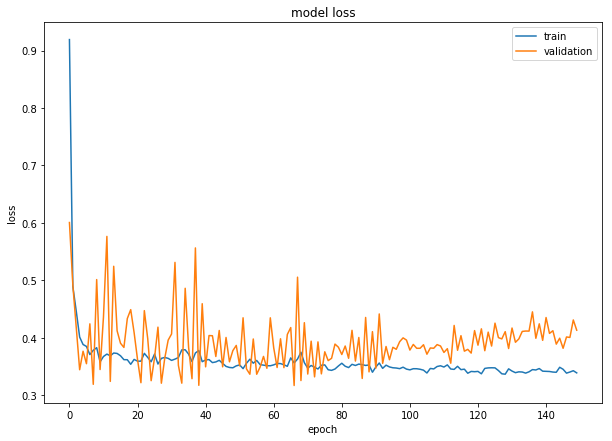

In [69]:
# summarize history for loss
plt.figure(figsize=(10,7))
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

## Predicting the Trend

Now, we will create a list called predict_close that would hold the DNN model's predicitons on the test data.

The output of the keras predict function is a probability value, where a probability of more than 0.5 means that the data belongs to class 1 and a probability of less than or equal to 0.5 means that the data belongs to class 0.

Based on these probability values, we will seperate the Buy and Sell signals for the strategy, by assuming a buy signal of +1 when the output probability is more than 0.5 and a sell signal of -1 otherwise.

In [70]:
predict_trend=np.ones(len(X_test))
for i in range(X_test.shape[0]):    
    predict_trend[i]=np.where(model.predict(np.expand_dims(X_test[i],axis=0))[0][0]>0.5,1,-1)
predict_trend=np.reshape(predict_trend,(1,-1)).tolist()[0]
y_test=np.where(y_test==0,-1,1)
from sklearn.metrics import accuracy_score

acc= accuracy_score(list(y_test),list(predict_trend))

In [71]:
print("The Accuracy of the model on the test set is:",acc*100,'%')
print("\n\n\nThe Signals Predicted\n",list(predict_trend))

The Accuracy of the model on the test set is: 48.0 %



The Signals Predicted
 [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]


## Visualizing and comparing the performance

Now, let us plot the performance of the model on the test data by multiplying the buy and sell signals with the corresponding future returns.

Once we calculate the percentage returns of the model, we will take a cumulative sum of all these returns on the test data to measure the overall performance of the model.


We have also plotted the cumulative markets returns to compare how a simple Buy and Hold strategy would have performed in comparison to our model.

The annualized interest rate in India is currently 6%. So, for the 100-day period in the test data, the interest rate would be adjusted.

In [72]:
market_returns=pd.Series(data.Close.shift(-1).iloc[-test_size:].pct_change().values)
strategy_returns=pd.Series(predict_trend*market_returns)
intrest_rate=0.06/3

In [73]:
Sharpe=(np.nansum(strategy_returns)-intrest_rate)/strategy_returns.std()

In [74]:
Sharpe

-2.5546157980994835

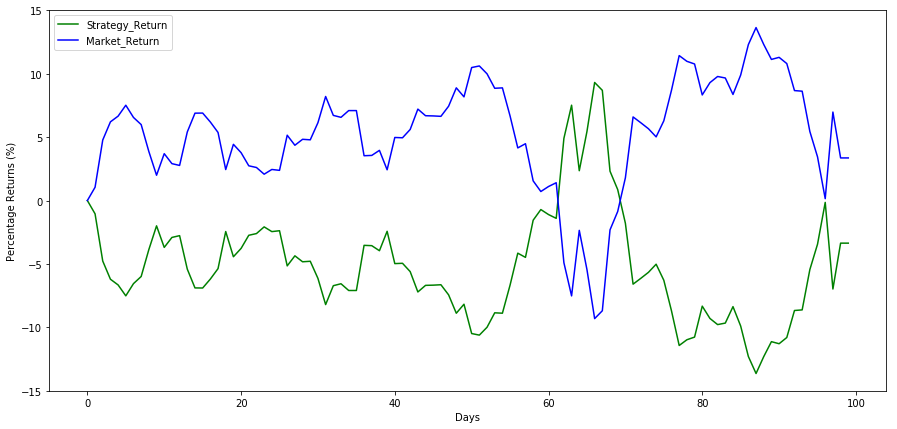

In [75]:
plt.figure(figsize=(15,7))
plt.plot(np.nancumsum(strategy_returns)*100,c='g')
plt.plot(np.nancumsum(market_returns)*100,c='b')
plt.ylabel('Percentage Returns (%)')
plt.xlabel('Days')
plt.legend(['Strategy_Return','Market_Return'])
plt.show()


In [76]:
final_return=np.nancumsum(strategy_returns)*100

### Conculsion

In the past 100 days, the model has returned (%)

In [77]:
final_return[-1]

-3.3575875379511344

####  Please note: We have given a simple classifier model that could be used for paper trading. This is just a toy example, and not meant for real trading. To build a more robust classification model, we need to perform thorough satistical analysis on multiple data sets and time frames.